# Tugas Data Science AI for Business
# KBS untuk rumah123.com

### Oleh
18219006 Marcelino Feihan

18219014 Zarfa Naida Pratista

18219058 Afif Fahreza


## Organisasi
rumah123.com adalah sebuah situs pencarian properti di Indonesia. Situs ini juga menyediakan berita dan fitur pemberitahuan tentang properti. Ada juga beberapa perangkat yang dapat digunakan seperti Kalkulator KPR untuk melakukan kalkulasi sebelum membeli properti. Dengan lebih dari 900,000 listing, rumah123.com dapat membantu masyarakat Indonesia dalam menemukan rumah mereka dan investasi properti.

## Masalah
Orang-orang yang masih awam terhadap bidang properti masih kesulitan memilih properti yang berpeluang baik untuk investasi karena tidak mengetahui cara melakukan perhitungan kenaikan harga dari properti. Hal ini menyebabkan tidak banyak orang awam properti yang mencari properti di situs ini untuk berinvestasi.

Pengguna situs rumah123.com tentu akan meningkat  jika orang-orang yang tidak mengerti tentang bidang properti tetap bisa mengetahui peluang investasi tiap properti yang ada pada situs.

## Metode pengukuran keberhasilan 
Terhitungnya besar peluang investasi untuk tiap properti yang ada pada situs rumah123.com

## Data dan Sumber
- Harga properti 
- Tahun update harga properti
- Lokasi dari properti
- Persentase kenaikan properti tiap tahun

Sumber : web scraping rumah123.com

## === Analisis Data ===

Import Library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Membaca data dari file CSV

In [2]:
data = pd.read_csv("data.csv")

Menampilkan data

In [3]:
data[:5]

,property_title,property_agent,location,latitude,longitude,phone_number,property_type,land_area,building_area,price_idr,num_bathroom,num_bedroom,garage_capacity
0,Perumahan Annieland Balaraja Cisoka Rumah Siap...,Independent Property Agent,"Cisoka, Tangerang",-6.269770,106.433003,6.281839e+10,Rumah,60,36,1.680000e+08,1,2,1
1,Rumah Mewah 2 Lantai Termurah Di Jabodetabek,Independent Property Agent,"Bukit Sentul, Bogor",-6.618206,106.879065,6.208950e+13,Rumah,80,90,7.850000e+08,2,3,2
2,Perumahan Muslim Segera Survey Banyak Kejutan ...,K-Pro,"Kalisari, Jakarta Timur",-6.336080,106.852973,6.281116e+11,Rumah,91,105,1.470000e+09,4,4,1
3,Dijual rumah murah di Dago lokasi strategis da...,Onasis Property Bandung,"Dago, Bandung",-6.904979,107.610479,8.129633e+10,Rumah,60,90,1.170000e+09,2,3,0
4,Rumah minimalis deket stasiun tambun,JPI Propertindo Ps. Minggu,"Tambun Selatan, Bekasi",-6.272237,107.066368,6.283806e+12,Rumah,60,36,3.450000e+08,1,2,1


Menampilkan atribut pada data

In [4]:
data.columns

Index(['property_title', 'property_agent', 'location', 'latitude', 'longitude',
       'phone_number', 'property_type', 'land_area', 'building_area',
       'price_idr', 'num_bathroom', 'num_bedroom', 'garage_capacity'],
      dtype='object')

Menampilkan minimum, maksimum, median, dan rata-rata harga properti

In [5]:
print("Mean = ",data['price_idr'].mean())
print("Minimum = ",data['price_idr'].min())
print("Maximum = ",data['price_idr'].max())
print("Median = ",data['price_idr'].median())

Mean =  6546773371.842962
Minimum =  3500000.0
Maximum =  350000000000.0
Median =  2200000000.0


Visualisasi range harga properti

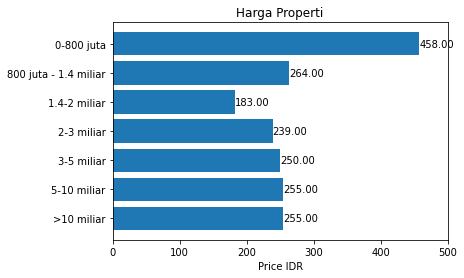

In [6]:
dataLabel = ['0-800 juta', '800 juta - 1.4 miliar', '1.4-2 miliar', '2-3 miliar', '3-5 miliar', '5-10 miliar', '>10 miliar']
dataCount = [0, 0, 0, 0, 0, 0, 0]

for price in data['price_idr']:
    if price < 800000000:
        dataCount[0] += 1
    elif price >= 800000000 and price < 1400000000:
        dataCount[1] += 1
    elif price >= 1400000000 and price < 2000000000:
        dataCount[2] += 1
    elif price >= 2000000000 and price < 3000000000:
        dataCount[3] += 1
    elif price >= 3000000000 and price < 5000000000:
        dataCount[4] += 1
    elif price >= 5000000000 and price < 10000000000:
        dataCount[5] += 1
    elif price >= 10000000000:
        dataCount[6] += 1

fig, ax = plt.subplots()
y_pos = np.arange(len(dataLabel))
hbars = ax.barh(y_pos, dataCount, align='center')
ax.set_yticks(y_pos, labels=dataLabel)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Price IDR')
ax.set_title('Harga Properti')

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%.2f')
ax.set_xlim(right=500)  # adjust xlim to fit labels

plt.show()

<AxesSubplot:title={'center':'Persebaran Jumlah Kamar'}>

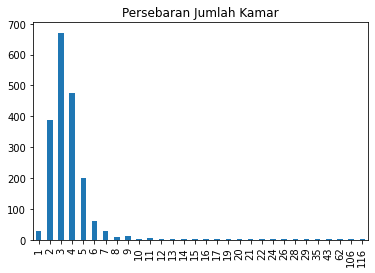

In [7]:
df = data[data['num_bedroom']!='nan']
df['num_bedroom'].value_counts(dropna=True).sort_index().plot(kind="bar",x='num_bedroom',y='counts',title="Persebaran Jumlah Kamar")

<AxesSubplot:title={'center':'Persebaran Jumlah Garasi'}>

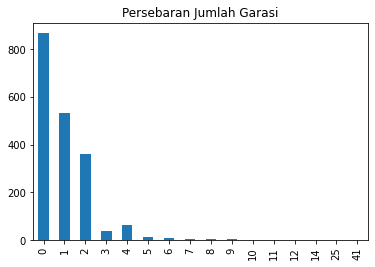

In [8]:
df = data[data['garage_capacity']!='nan']
df['garage_capacity'].value_counts(dropna=True).sort_index().plot(kind="bar",x='garage_capacity',y='counts',title="Persebaran Jumlah Garasi")

<AxesSubplot:title={'center':'Persebaran Jumlah Kamar Mandi'}>

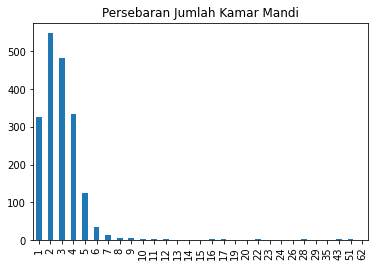

In [9]:
df = data[data['num_bathroom']!='nan']
df['num_bathroom'].value_counts(dropna=True).sort_index().plot(kind="bar",x='num_bathroom',y='counts',title="Persebaran Jumlah Kamar Mandi")

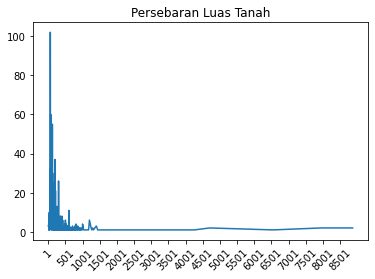

In [10]:
fig, ax = plt.subplots()
ax.plot(data['land_area'].value_counts().sort_index())
ax.set_title("Persebaran Luas Tanah")
plt.xticks(np.arange(min(data['land_area']), max(data['land_area']), 500),rotation=45)
plt.show()

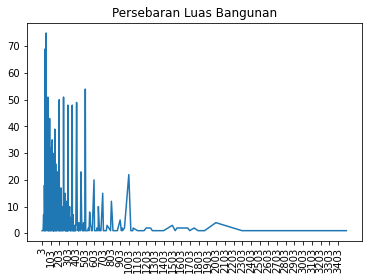

In [11]:
fig, ax = plt.subplots()
ax.plot(data['building_area'].value_counts().sort_index())
ax.set_title("Persebaran Luas Bangunan")
plt.xticks(np.arange(min(data['building_area']), max(data['building_area']), 100),rotation=90)
plt.show()